#Libraries*

In [ ]:
import pandas as pd
import numpy as np
import math

import nltk
nltk.download('all')

!pip install nbspellcheck
from spellchecker import SpellChecker

from wordcloud import WordCloud, STOPWORDS
from string import punctuation

import re,string,unicodedata
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize

from nltk.corpus import wordnet, stopwords

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.preprocessing import minmax_scaling

import collections

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

# Connecting to Gdrive*


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
pwd

'/content/gdrive/MyDrive'

In [ ]:
#ls

#Reading Data

In [ ]:
df_train = pd.read_csv('training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')

In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test = pd.read_csv('test_set.tsv', sep='\t', encoding='ISO-8859-1')

In [ ]:
df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [ ]:
#df_test.info()

In [ ]:
#df_train.info()

In [ ]:
#df_train.isnull().sum()

In [ ]:
df_train.dropna(axis = 1, inplace = True)

In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [ ]:
#df_train.describe()

In [ ]:
#print(df_train['essay_set'].nunique())
#df_train['essay_set'].unique()

In [ ]:
#print(df_train.groupby('essay_set').size())

In [ ]:
#print(df_train['rater1_domain1'].nunique())
#df_train['rater1_domain1'].unique()

In [ ]:
#print(df_train.groupby('rater1_domain1').size())

Note : None of the essay got 29 as rater1_domain1

In [ ]:
#print(df_train['rater2_domain1'].nunique())
#df_train['rater2_domain1'].unique()

In [ ]:
#print(df_train.groupby('rater1_domain1').size())

In [ ]:
#df_train['domain1_score'].max()

In [ ]:
#df_train['domain1_score'].min()

#Numerical Feature Extraction

In [ ]:
def remove_it(text):
    text = text.lower()
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('@', '', text)
    return text

In [ ]:
df_train['essay'] = df_train['essay'].apply(lambda x: remove_it(x))

In [ ]:
temporary_2 = df_train.copy()

In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"dear local newspaper, i think effects computer...",4,4,8
1,2,1,"dear , i believe that using computers will be...",5,4,9
2,3,1,"dear, more and more people use computers, b...",4,3,7
3,4,1,"dear local newspaper, i have found that many ...",5,5,10
4,5,1,"dear , i know having computers has a positive ...",4,4,8


In [ ]:
df_train['essay'][0]

"dear local newspaper, i think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! thing about! dont you think so? how would you feel if your teenager is always on the phone with friends! do you ever time to chat with your friends or buisness partner about things. well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: , , , facebook, myspace ect. just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. how did you learn about other countrys/states outside of yours? well i have by computer/internet, it's a new way to learn about what going on in our time! you might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even abo

In [ ]:
def remove_it_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)

    remove = string.punctuation
    remove = remove.replace(".","")
    remove = remove.replace("?","")
    remove = remove.replace("!","")

    text = re.sub('[%s]' % re.escape(remove), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
temporary_2['essay'] = temporary_2['essay'].apply(lambda x: remove_it_1(x))

In [ ]:
df_train_2 = temporary_2['essay'].copy()

In [ ]:
df_train_1 = temporary_2['essay'].to_numpy()

In [ ]:
df_train_1[0]

'dear local newspaper i think effects computers have on people are great learning skillsaffects because they give us time to chat with friendsnew people helps us learn about the globeastronomy and keeps us out of troble! thing about! dont you think so? how would you feel if your teenager is always on the phone with friends! do you ever time to chat with your friends or buisness partner about things. well now  theres a new way to chat the computer theirs plenty of sites on the internet to do so    facebook myspace ect. just think now while your setting up meeting with your boss on the computer your teenager is having fun on the phone not rushing to get off cause you want to use it. how did you learn about other countrysstates outside of yours? well i have by computerinternet its a new way to learn about what going on in our time! you might think your child spends a lot of time on the computer but ask them so question about the economy sea floor spreading or even about the s youll be sur

In [ ]:
df_train_2[0]

'dear local newspaper i think effects computers have on people are great learning skillsaffects because they give us time to chat with friendsnew people helps us learn about the globeastronomy and keeps us out of troble! thing about! dont you think so? how would you feel if your teenager is always on the phone with friends! do you ever time to chat with your friends or buisness partner about things. well now  theres a new way to chat the computer theirs plenty of sites on the internet to do so    facebook myspace ect. just think now while your setting up meeting with your boss on the computer your teenager is having fun on the phone not rushing to get off cause you want to use it. how did you learn about other countrysstates outside of yours? well i have by computerinternet its a new way to learn about what going on in our time! you might think your child spends a lot of time on the computer but ask them so question about the economy sea floor spreading or even about the s youll be sur

In [ ]:
from nltk.tokenize import sent_tokenize

for i in range(0,len(df_train_1)):
  text = df_train_1[i]
  text = sent_tokenize(text)
  df_train_1[i] = text

In [ ]:
df_train_1[0]

['dear local newspaper i think effects computers have on people are great learning skillsaffects because they give us time to chat with friendsnew people helps us learn about the globeastronomy and keeps us out of troble!',
 'thing about!',
 'dont you think so?',
 'how would you feel if your teenager is always on the phone with friends!',
 'do you ever time to chat with your friends or buisness partner about things.',
 'well now  theres a new way to chat the computer theirs plenty of sites on the internet to do so    facebook myspace ect.',
 'just think now while your setting up meeting with your boss on the computer your teenager is having fun on the phone not rushing to get off cause you want to use it.',
 'how did you learn about other countrysstates outside of yours?',
 'well i have by computerinternet its a new way to learn about what going on in our time!',
 'you might think your child spends a lot of time on the computer but ask them so question about the economy sea floor sprea

In [ ]:
feature=pd.DataFrame(data=None, columns=['sentence','comma','exclamation','bracket','punctuation','quotation','word','word_length','long_word','verb','adverb','noun','pronoun','adjective','foreign','wrong_spell'])
 
feature['comma'] = df_train.essay.str.count(",") 
feature['exclamation'] = df_train.essay.str.count("\!") 
feature['bracket'] = 0.5*df_train.essay.str.count("\(|\)")
feature['punctuation'] = df_train.essay.str.count('[%s]' % re.escape(string.punctuation))
feature['quotation'] = 0.5*df_train.essay.str.count("\"")

In [ ]:
for i in range(0,len(df_train_1)):
  feature.at[i,'sentence'] = len(df_train_1[i])
 

#DATA CLEANING(10 minutes completion time)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_train['essay'] = df_train['essay'].apply(lambda x: clean_text(x))

In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper i think effects computers...,4,4,8
1,2,1,dear i believe that using computers will ben...,5,4,9
2,3,1,dear more and more people use computers but...,4,3,7
3,4,1,dear local newspaper i have found that many e...,5,5,10
4,5,1,dear i know having computers has a positive e...,4,4,8


In [ ]:
df_test['essay'] = df_test['essay'].apply(lambda x: clean_text(x))

In [ ]:
df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,i believe that computers have a positive effec...,2383,NaN
1,2384,1,dear i know some problems have came up where ...,2384,NaN
2,2385,1,dear to whom it concern computers arent the r...,2385,NaN
3,2386,1,dear has come to my attention that some peo...,2386,NaN
4,2387,1,dear local newspaper i think that people have ...,2387,NaN


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Tokenizing the training set
df_train['essay'] = df_train['essay'].apply(lambda x: tokenizer.tokenize(x))

# Tokenizing the test set
df_test['essay'] = df_test['essay'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
print()
print('Tokenized String:')
df_train['essay'].head()


Tokenized String:


0    [dear, local, newspaper, i, think, effects, co...
1    [dear, i, believe, that, using, computers, wil...
2    [dear, more, and, more, people, use, computers...
3    [dear, local, newspaper, i, have, found, that,...
4    [dear, i, know, having, computers, has, a, pos...
Name: essay, dtype: object

In [ ]:
print()
print('Tokenized String:')
df_test['essay'].head()


Tokenized String:


0    [i, believe, that, computers, have, a, positiv...
1    [dear, i, know, some, problems, have, came, up...
2    [dear, to, whom, it, concern, computers, arent...
3    [dear, has, come, to, my, attention, that, som...
4    [dear, local, newspaper, i, think, that, peopl...
Name: essay, dtype: object

In [ ]:
def remove_stopwords(text):
    
    words = [word for word in text if word not in stopwords.words('english')]
    return words

In [ ]:
df_train['essay'] = df_train['essay'].apply(lambda x: remove_stopwords(x))

In [ ]:
df_test['essay'] = df_test['essay'].apply(lambda x: remove_stopwords(x))

In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"[dear, local, newspaper, think, effects, compu...",4,4,8
1,2,1,"[dear, believe, using, computers, benefit, us,...",5,4,9
2,3,1,"[dear, people, use, computers, everyone, agree...",4,3,7
3,4,1,"[dear, local, newspaper, found, many, experts,...",5,5,10
4,5,1,"[dear, know, computers, positive, effect, peop...",4,4,8


In [ ]:
df_test.head()


,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,"[believe, computers, positive, effect, people,...",2383,NaN
1,2384,1,"[dear, know, problems, came, individuals, agre...",2384,NaN
2,2385,1,"[dear, concern, computers, arent, reason, peop...",2385,NaN
3,2386,1,"[dear, come, attention, people, believe, techn...",2386,NaN
4,2387,1,"[dear, local, newspaper, think, people, lately...",2387,NaN


In [ ]:
df_test.to_csv('clean_test_set.csv', index=False)

In [ ]:
file1=pd.read_csv('clean_test_set.csv')
file1.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,"['believe', 'computers', 'positive', 'effect',...",2383,NaN
1,2384,1,"['dear', 'know', 'problems', 'came', 'individu...",2384,NaN
2,2385,1,"['dear', 'concern', 'computers', 'arent', 'rea...",2385,NaN
3,2386,1,"['dear', 'come', 'attention', 'people', 'belie...",2386,NaN
4,2387,1,"['dear', 'local', 'newspaper', 'think', 'peopl...",2387,NaN


In [ ]:
df_train.to_csv('clean_train_set.csv', index=False)

In [ ]:
file=pd.read_csv('clean_train_set.csv')
file.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"['dear', 'local', 'newspaper', 'think', 'effec...",4,4,8
1,2,1,"['dear', 'believe', 'using', 'computers', 'ben...",5,4,9
2,3,1,"['dear', 'people', 'use', 'computers', 'everyo...",4,3,7
3,4,1,"['dear', 'local', 'newspaper', 'found', 'many'...",5,5,10
4,5,1,"['dear', 'know', 'computers', 'positive', 'eff...",4,4,8


#Feature Extraction(4 minutes completion time)

In [ ]:
feature['word'] = [len(x.split()) for x in file['essay'].tolist()]
feature['word_length'] = file.essay.apply(len)/feature['word']

In [ ]:
average = feature.mean(axis=0, skipna=True)['word_length']

In [ ]:
list1 = file['essay'].str.split(',|\ |\[|\]|\'')

for i in range(0,len(list1)):
  list1[i] = [x for x in list1[i] if x!='']

for k in range(0,len(list1)):
    count=0
    for j in range(0,len(list1[k])):
        if(len(list1[k][j])>=average):
            count = count + 1
    feature.at[k,'long_word']=count     

In [ ]:

for i in range(0,len(df_train_1)):
    noun = 0
    pronoun = 0
    verb = 0
    adverb = 0
    adjective = 0
    foreign = 0

    for j in range(0,len(df_train_1[i])):

        tokens = nltk.word_tokenize(df_train_1[i][j])
        t=nltk.pos_tag(tokens)

        for ii in range(0,len(t)):
           if t[ii][1][0] == 'N':
              noun = noun + 1
           if t[ii][1][0] == 'P' and t[ii][1][1] == 'R':
              pronoun = pronoun + 1
           if t[ii][1][0] == 'V':
              verb = verb + 1
           if t[ii][1][0] == 'R' and t[ii][1][1] == 'B':
              adverb = adverb + 1
           if t[ii][1][0] == 'J':
              adjective = adjective + 1
           if t[ii][1][0] == 'F':
              foreign = foreign + 1

    feature.at[i,'noun'] = noun
    feature.at[i,'pronoun'] = pronoun
    feature.at[i,'verb'] = verb
    feature.at[i,'adverb'] = adverb
    feature.at[i,'adjective'] = adjective
    feature.at[i,'foreign'] = foreign
                 

In [ ]:
spell = SpellChecker()

for i in range(0,len(df_train['essay'])):
    misspelled = spell.unknown(df_train['essay'][i])
    feature.at[i,'wrong_spell'] =len(misspelled)

In [ ]:
feature.iloc[0:10,:]

,sentence,comma,exclamation,bracket,punctuation,quotation,word,word_length,long_word,verb,adverb,noun,pronoun,adjective,foreign,wrong_spell
0,16,18,4,1.0,50,0.0,158,9.791139,9,71,22,75,37,19,0,10
1,20,12,1,0.0,36,0.0,216,9.671296,11,86,15,100,35,19,1,9
2,14,9,0,0.0,27,0.0,132,10.053030,6,48,14,77,13,20,0,0
3,27,13,2,0.0,50,1.5,259,10.250965,16,94,28,135,21,40,0,17
4,30,13,0,0.0,51,0.0,221,9.968326,11,90,33,109,27,28,0,9
5,15,3,1,0.0,21,0.0,101,9.623762,7,48,16,50,24,10,0,5
6,30,35,0,0.0,74,0.0,251,9.900398,11,81,37,126,52,28,0,1
7,39,11,1,0.0,79,1.0,243,9.897119,18,111,25,113,38,36,0,2
8,35,16,1,0.0,65,1.5,216,9.708333,13,82,30,106,29,32,0,1
9,26,14,0,0.0,57,0.0,228,9.429825,11,104,30,104,35,41,0,4


In [ ]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sentence     12976 non-null  object 
 1   comma        12976 non-null  int64  
 2   exclamation  12976 non-null  int64  
 3   bracket      12976 non-null  float64
 4   punctuation  12976 non-null  int64  
 5   quotation    12976 non-null  float64
 6   word         12976 non-null  int64  
 7   word_length  12976 non-null  float64
 8   long_word    12976 non-null  object 
 9   verb         12976 non-null  object 
 10  adverb       12976 non-null  object 
 11  noun         12976 non-null  object 
 12  pronoun      12976 non-null  object 
 13  adjective    12976 non-null  object 
 14  foreign      12976 non-null  object 
 15  wrong_spell  12976 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 1.6+ MB


In [ ]:
feature.to_csv('dataset.csv', index=False)

#NLP Advanced

In [ ]:
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("english",ignore_stopwords=True)


w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def stemming_text(text):
     return [" ".join(stemmer.stem(w) for w in w_tokenizer.tokenize(text))]

df_train_2 = df_train_2.apply(stemming_text)

In [ ]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  
        
        
df_train_2 = df_train_2.apply(listToString)

In [ ]:
df_train_2[0]

'dear local newspap i think effect comput have on peopl are great learn skillsaffect because they give us time to chat with friendsnew peopl help us learn about the globeastronomi and keep us out of troble! thing about! dont you think so? how would you feel if your teenag is alway on the phone with friends! do you ever time to chat with your friend or buis partner about things. well now there a new way to chat the comput theirs plenti of site on the internet to do so facebook myspac ect. just think now while your set up meet with your boss on the comput your teenag is having fun on the phone not rush to get off caus you want to use it. how did you learn about other countrysst outsid of yours? well i have by computerinternet its a new way to learn about what go on in our time! you might think your child spend a lot of time on the comput but ask them so question about the economi sea floor spread or even about the s youll be surpris at how much hesh knows. believ it or not the comput is 

In [ ]:
feature = pd.read_csv('dataset.csv')

In [ ]:
set_array = np.array([0,1785,3585,5311,7081,8886,10686,12255,12978])

tfidf = CountVectorizer(max_df=0.8,min_df=0.0,ngram_range=(1,3),stop_words='english',max_features=60)

for i in range(0,8):

    tr = tfidf.fit_transform(df_train_2[set_array[i]:set_array[i+1]])

    if i==0:
      df_tfidf = pd.DataFrame(data=tr.toarray(),columns=tfidf.get_feature_names())

    else:
      tf_temp = pd.DataFrame(data=tr.toarray(),columns=tfidf.get_feature_names())
      df_tfidf = df_tfidf.append(tf_temp,ignore_index=True)

    if i==7:
      # feata = pd.DataFrame(data=feature[12255:12978][:].to_numpy(),index=list(range(0,721)))
      feature = pd.concat([feature,df_tfidf], axis=1)
      # feature = df_tfidf


In [ ]:
feature = feature.fillna(0)
feature.iloc[6060:6070,170:200]

,end stori,fail,flower,gees,gees return,gees return hibiscus,hibiscus,hibiscus bud,hibiscus bud test,home,melt,melt gees,melt gees return,mother,paragraph,pass,plant,reader,return,return hibiscus,return hibiscus bud,saeng,snow,snow melt,snow melt gees,spring,spring snow,spring snow melt,start,stori paragraph
6060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6061,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6062,1.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6063,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6065,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0
6066,1.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6068,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6069,1.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
feature.shape

(12976, 342)

In [ ]:
feature.to_csv('main_dataset.csv', index=False)

#Polynomial Regression Model(SET WISE)*

In [ ]:
set_ = np.array([0,1785,3585,5311,7081,8886,10686,12255,12978])
set_1=0
set_2=1785
set_3=3585
set_4=5311
set_5=7081
set_6=8886
set_7=10686
set_8=12255
end=12978
j=6                       # j=2 means set number 3.

In [ ]:
X = pd.read_csv('main_dataset.csv')

In [ ]:
graph = X['adjective'][set_1:end].to_numpy()

In [ ]:
X = minmax_scaling(X, columns = X.columns)

In [ ]:
X = X.to_numpy()

In [ ]:
y = pd.read_csv('clean_train_set.csv')

In [ ]:
y = y['domain1_score'].to_numpy()

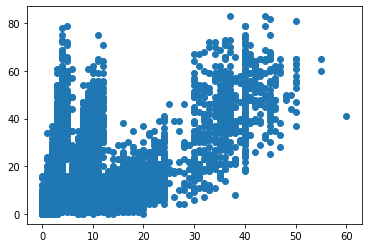

In [ ]:
plt.scatter(y[set_1:end],graph)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
 
column = ['Essay_set','Essay_number', 'Predicted', 'Actual']
 
for i in range(0,8):
 
     X1 = X[set_[i]:set_[i+1],:] 
     y1 = y[set_[i]:set_[i+1]]
 
     #print("SET",i+1,"actual scores:\n\n",y1[100:200],'\n\n') 
 
     x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.15,random_state=50)
 
     poly = PolynomialFeatures(degree=1)
     x=poly.fit_transform(x_train)
 
     clf = linear_model.LinearRegression()
     clf.fit(x,y_train)
 
     initial = 0
     final = len(x_test)
     predict_ = poly.fit_transform(x_test[initial:final,:])
 
     
     tempo = np.c_[ np.full((final-initial, 1), i+1) , initial + np.arange(final-initial), clf.predict(predict_) , y_test[initial:final] ]
   
     if i==0:  
        result = np.c_[ np.full((final-initial, 1), i+1) , initial + np.arange(final-initial), clf.predict(predict_) , y_test[initial:final] ]
     else:
        result = np.append(result, tempo, axis=0)

In [ ]:
output_result = pd.DataFrame(data = result, columns = column)

In [ ]:
len(output_result)

1949

#Predict Here*

In [ ]:
answer = pd.DataFrame(data = None, columns = column)

In [ ]:
iii=0
for i in range(0,len(output_result)):
   if output_result['Essay_set'][i]==8.0:
      answer.at[iii, 'Essay_set']=output_result['Essay_set'][i]
      answer.at[iii, 'Essay_number']=output_result['Essay_number'][i]
      answer.at[iii, 'Actual']=output_result['Actual'][i]
      answer.at[iii, 'Predicted']=output_result['Predicted'][i]
      iii=iii+1

In [ ]:
answer[:][60:80]

,Essay_set,Essay_number,Predicted,Actual
60,8,60,35.2747,34
61,8,61,40.1937,45
62,8,62,32.945,33
63,8,63,41.4126,40
64,8,64,30.453,32
65,8,65,40.1168,40
66,8,66,34.7089,40
67,8,67,34.5571,37
68,8,68,40.38,40
69,8,69,37.4909,46


In [ ]:
RMSE = pd.DataFrame(data = None, columns = ['Essay_set','Marking_Scale','RMSE','Max_AE'])
 
e_set = 1.0
ind = 0
rmse = 0.0
index = 0
max=0
 
for i in range(0,len(output_result)):
 
    if output_result['Essay_set'][i] == e_set + 1:
        RMSE.at[index,'RMSE'] = math.sqrt(rmse/(len(output_result[0:i]) - len(output_result[0:ind])))
        RMSE.at[index,'Essay_set'] = e_set
        RMSE.at[index,'Max_AE'] = max  
        rmse = 0.0
        e_set = e_set + 1
        asb=output_result['Actual'][i]-output_result['Predicted'][i]
        rmse= rmse + asb*asb
        ind = i
        index = index + 1
        max=abs(asb)
        
    asb=output_result['Actual'][i]-output_result['Predicted'][i]
    rmse= rmse + asb*asb 
 
    if max<abs(asb):
        max=abs(asb)
 
RMSE.at[index,'RMSE'] = math.sqrt(rmse/(len(output_result[0:i]) - len(output_result[0:ind])))
RMSE.at[index,'Essay_set'] = e_set
RMSE.at[index,'Max_AE'] = max  
 
RMSE['Marking_Scale'] = pd.Series(['2-12','1-5','0-3','0-3','0-4','0-4','0-30','0-60'])

In [ ]:
 
c=0
k=0
e_set=1.0
index=0
 for i in range(0,len(output_result)):
 
   if output_result['Essay_set'][i] == e_set:
      if abs(output_result['Predicted'][i]-output_result['Actual'][i])<=RMSE['RMSE'][index]:
          c=c+1
      k=k+1
 
   else:
      RMSE.at[index,'Agreement with RMSE'] = 100*c/k
      index = index + 1
      c=0
      k=0
      i=i-1
      e_set=e_set+1
 
RMSE.at[index,'Agreement with RMSE'] = 100*c/k

In [ ]:
 RMSE[:][:]

,Essay_set,Marking_Scale,RMSE,Max_AE,Agreement with RMSE
0,1,2-12,0.907016,3.90208,71.641791
1,2,1-5,0.566908,1.95505,68.773234
2,3,0-3,0.569914,1.94656,74.031008
3,4,0-3,0.645133,2.2733,72.075472
4,5,0-4,0.513809,1.74988,68.518519
5,6,0-4,0.574381,1.82212,66.914498
6,7,0-30,3.10101,9.24329,63.829787
7,8,0-60,3.56323,9.76179,69.444444
